# Jeshua Romero Guadarrama

# 1. Importación de Librerías Necesarias

In [1]:
# Importación de librerías generales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelado
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Algoritmos supervisados
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

# Algoritmos no supervisados
from sklearn.cluster import KMeans

# Métricas
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Procesamiento de imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Sistema operativo
import os

# Advertencias
import warnings
warnings.filterwarnings('ignore')


# 2. Generación/Carga del Conjunto de Datos

Utilizaré el conjunto de datos "California Housing" para tareas supervisadas y no supervisadas, y el conjunto de datos "MNIST" para procesamiento de imágenes.

In [2]:
# Descargar el conjunto de datos de California Housing
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Creación del DataFrame
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseValue'] = housing.target

# Mostrar las primeras filas
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


El código descarga el conjunto de datos "California Housing" utilizando la función `fetch_california_housing` de la librería `sklearn.datasets`; luego crea un DataFrame de pandas llamado `data` con las características del conjunto de datos asignando los nombres de las columnas según `housing.feature_names`, añade una columna adicional llamada `MedHouseValue` que contiene los valores objetivo (el valor medio de las casas) y, finalmente, muestra las primeras filas del DataFrame utilizando `data.head()`.

## 21. Histograma del Valor Medio de las Casas (MedHouseValue)

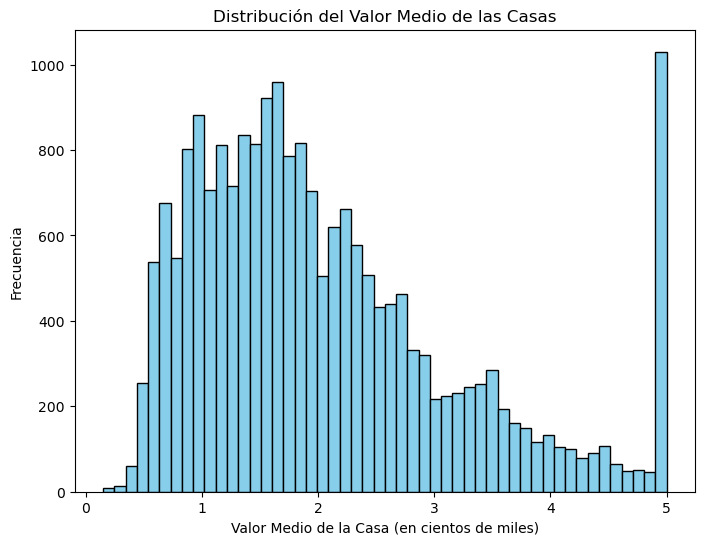

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(data['MedHouseValue'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución del Valor Medio de las Casas')
plt.xlabel('Valor Medio de la Casa (en cientos de miles)')
plt.ylabel('Frecuencia')
plt.show()

Este histograma muestra la distribución del valor medio de las casas en el conjunto de datos.

## 2.2. Mapa de Dispersión Geográfico (Latitud vs Longitud) Coloreado por Valor Medio de la Casa

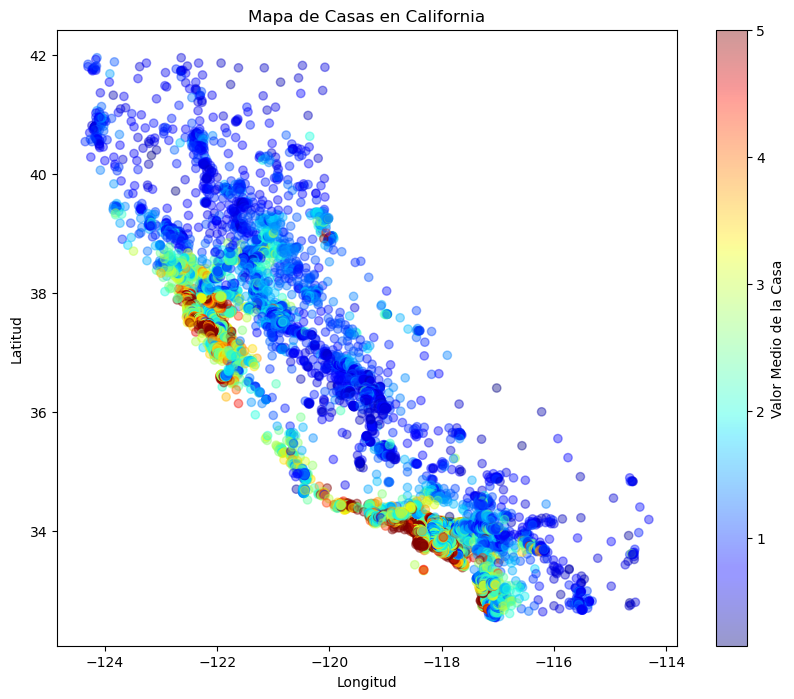

In [25]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['Longitude'], data['Latitude'], c=data['MedHouseValue'], cmap='jet', alpha=0.4)
plt.colorbar(scatter, label='Valor Medio de la Casa')
plt.title('Mapa de Casas en California')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Este gráfico muestra la ubicación geográfica de las casas, coloreando cada punto según el valor medio de la casa. Esto ayuda a visualizar cómo el valor de las casas varía según la ubicación.

## 2.3 Mapa de Calor de la Matriz de Correlación

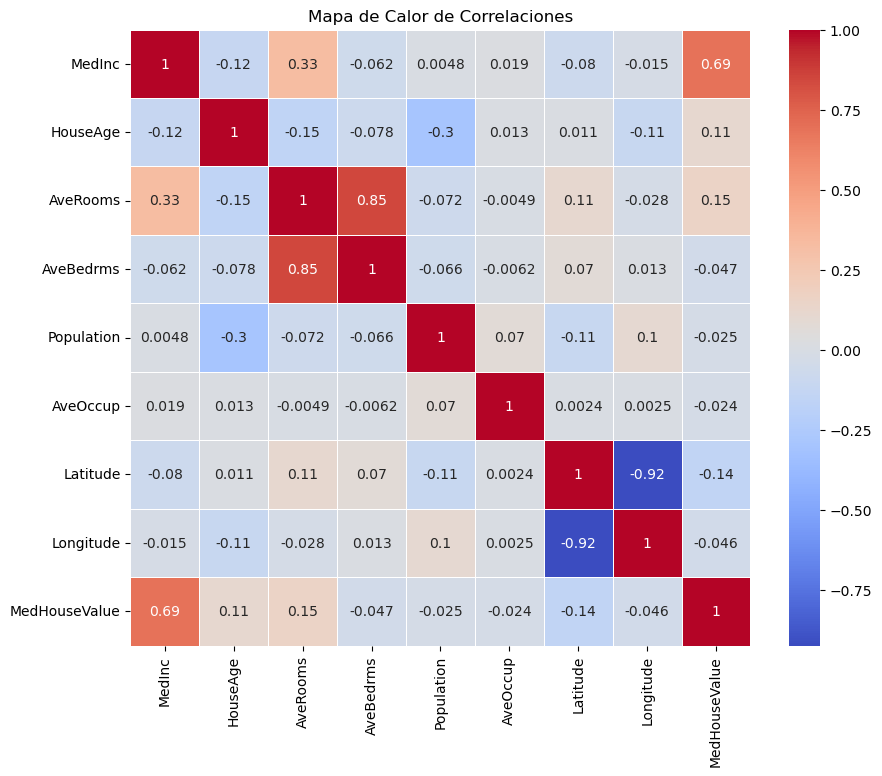

In [28]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Este mapa de calor muestra las correlaciones entre las diferentes características del conjunto de datos. Es útil para identificar relaciones fuertes o débiles entre variables.

## 2.4. Gráfico de Caja (Boxplot) de la Mediana de Ingresos (MedInc)

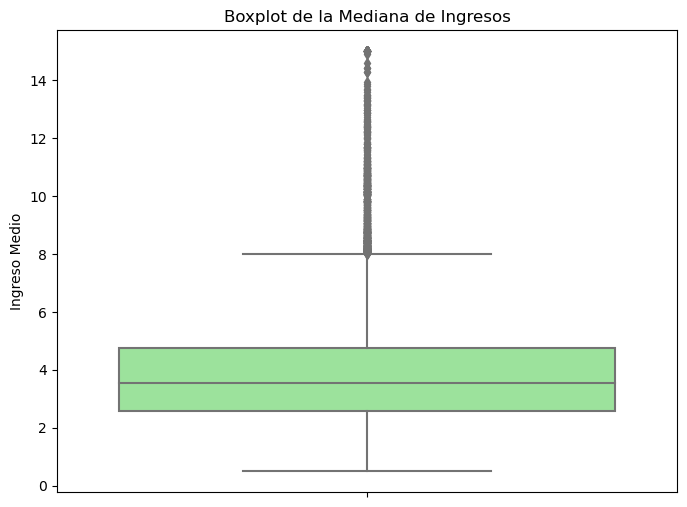

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['MedInc'], color='lightgreen')
plt.title('Boxplot de la Mediana de Ingresos')
plt.ylabel('Ingreso Medio')
plt.show()

Este boxplot muestra la distribución de los ingresos medios en diferentes cuantiles, destacando posibles valores atípicos.

## 2.5. Pares de Gráficos (Pairplot) de Características Seleccionadas

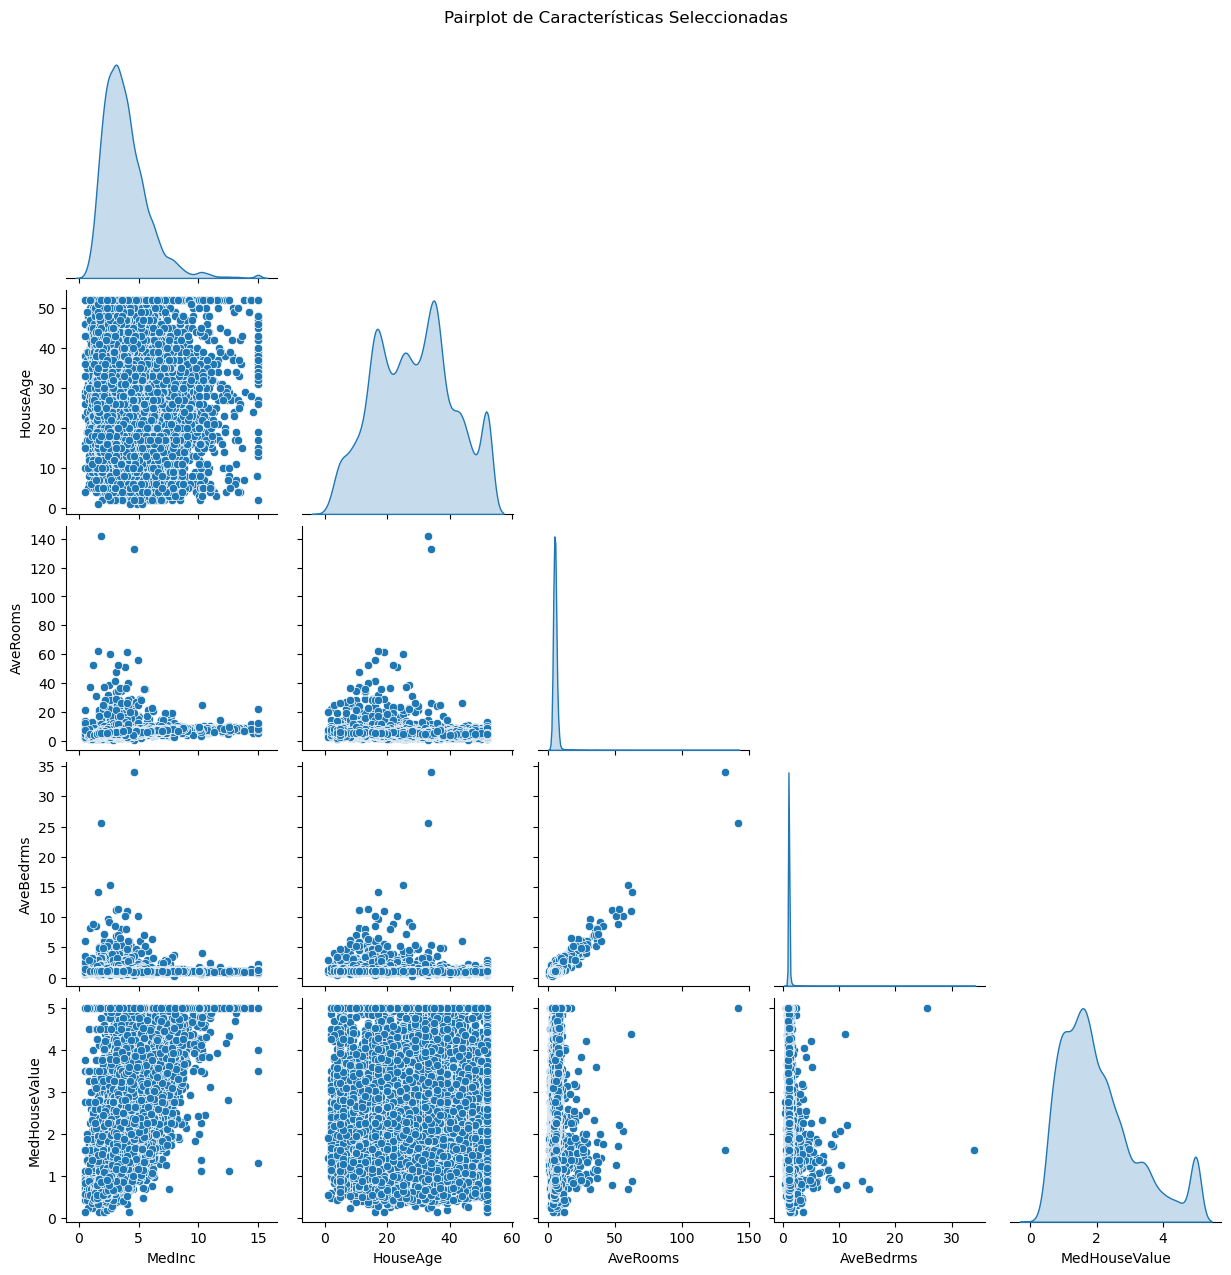

In [32]:
# Selección de características de interés
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseValue']

# Creación del pairplot
sns.pairplot(data[features], diag_kind='kde', corner=True)
plt.suptitle('Pairplot de Características Seleccionadas', y=1.02)
plt.show()

Este par de gráficos muestra las relaciones entre varias características seleccionadas, incluyendo la distribución de cada una.

# 3. Particionamiento de Datos

In [4]:
# Separación de características y variable objetivo
X = data.drop('MedHouseValue', axis=1)
y = data['MedHouseValue']

# División en conjuntos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1765, random_state=42)  # 0.1765*0.85 ≈ 0.15

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (14447, 8)
Tamaño del conjunto de validación: (3097, 8)
Tamaño del conjunto de prueba: (3096, 8)


El código separa las características independientes y la variable objetivo del DataFrame `data`, asignando a `X` todas las columnas excepto `'MedHouseValue'` y a `y` la columna `'MedHouseValue'`; luego divide los datos en conjuntos de entrenamiento, validación y prueba utilizando la función `train_test_split` de `sklearn.model_selection`: primero separa el 15% de los datos para el conjunto de prueba (`test_size=0.15`), luego divide el 85% restante en conjuntos de entrenamiento y validación, asignando aproximadamente el 15% del total al conjunto de validación (`test_size=0.1765` porque 0.1765 * 0.85 ≈ 0.15); finalmente, imprime los tamaños de los conjuntos de entrenamiento, validación y prueba resultantes mostrando las dimensiones de `X_train`, `X_val` y `X_test`.

# 4. Escalado de Características

In [7]:
# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

El código inicializa un objeto `StandardScaler` llamado `scaler` para realizar el escalado de las características numéricas; luego, ajusta (`fit_transform`) el escalador a los datos de entrenamiento `X_train`, produciendo `X_train_scaled` con las características escaladas; a continuación, utiliza el método `transform` del mismo escalador para transformar el conjunto de validación `X_val` y el conjunto de prueba `X_test`, generando `X_val_scaled` y `X_test_scaled` respectivamente, asegurando así que todos los conjuntos de datos están escalados de manera consistente según los parámetros calculados del conjunto de entrenamiento.

# 5. Algoritmo No Supervisado (K-Means)

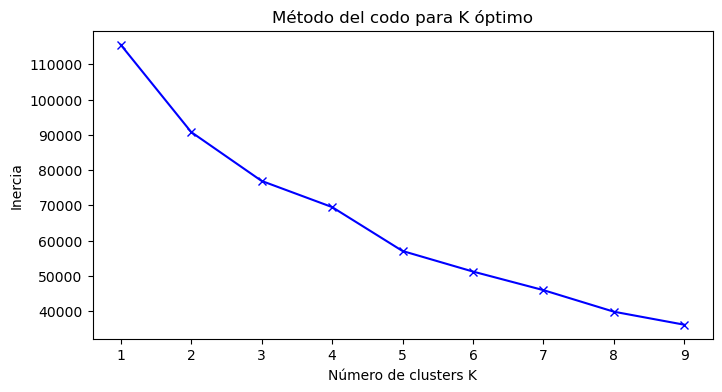

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
7052   3.2371      33.0  4.289700   1.008584      2170.0  4.656652     33.92   
4464   1.9038      35.0  4.155080   1.018717      1487.0  3.975936     34.08   
13229  8.5282      25.0  7.831050   1.107306      1284.0  2.931507     34.15   
6964   3.7833      47.0  5.438356   1.058219       827.0  2.832192     33.99   
17596  4.5795      28.0  6.025391   1.078125      1277.0  2.494141     37.31   

       Longitude  Cluster  
7052     -118.05        1  
4464     -118.19        1  
13229    -117.66        1  
6964     -118.06        1  
17596    -121.88        0  


In [8]:
# Determinación del número óptimo de clusters usando el método del codo
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters K')
plt.ylabel('Inercia')
plt.title('Método del codo para K óptimo')
plt.show()

# Selección de K=3 para este ejemplo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
clusters = kmeans.predict(X_train_scaled)

# Añadir clusters al conjunto de entrenamiento
X_train_clustered = X_train.copy()
X_train_clustered['Cluster'] = clusters

print(X_train_clustered.head())

El código determina el número óptimo de clusters para el algoritmo K-Means utilizando el método del codo. Inicializa una lista vacía llamada `inertia` y recorre un rango de valores de K desde 1 hasta 9. Para cada valor de K, crea un modelo `KMeans` con ese número de clusters y lo ajusta a los datos escalados de entrenamiento `X_train_scaled`, almacenando la inercia resultante en la lista. Luego grafica la inercia en función de K para visualizar el punto donde la disminución de la inercia se vuelve menos pronunciada (el "codo"), lo que sugiere el número óptimo de clusters. Selecciona K=3 como número óptimo y ajusta un nuevo modelo KMeans con K=3. Predice las etiquetas de cluster para `X_train_scaled` y añade esta información al conjunto de datos original de entrenamiento `X_train`, creando una nueva columna `Cluster`. Finalmente, muestra las primeras filas del DataFrame resultante con los clusters asignados.

Los resultados obtenidos muestran las primeras cinco filas del conjunto de datos de entrenamiento con la columna adicional `Cluster`, que indica a qué cluster pertenece cada observación según el modelo K-Means con K=3. Por ejemplo, las observaciones con índices 7052, 4464, 13229 y 6964 han sido asignadas al cluster 1, mientras que la observación con índice 17596 pertenece al cluster 0. Esto sugiere que el algoritmo ha identificado grupos dentro de los datos que comparten similitudes en las características, permitiendo una segmentación no supervisada de los datos de entrenamiento.

## 5.1 Gráfico de Barras de los Tamaños de los Clusters

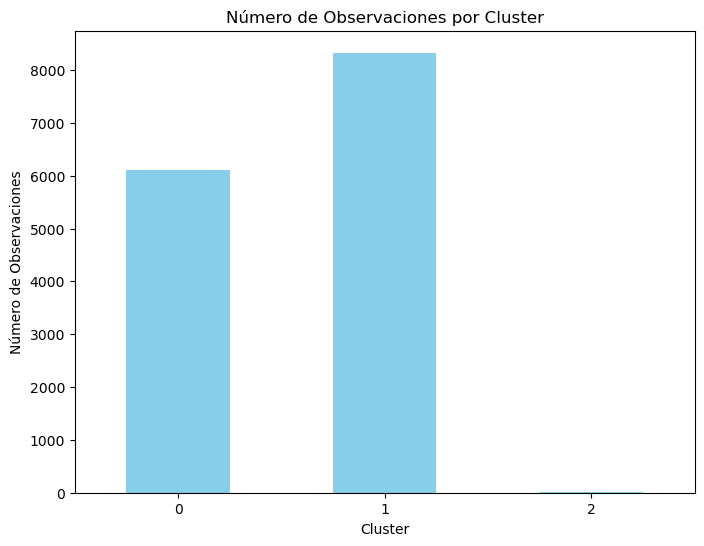

In [36]:
# Contar el número de observaciones en cada cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Número de Observaciones')
plt.title('Número de Observaciones por Cluster')
plt.xticks(rotation=0)
plt.show()

Este gráfico muestra cuántas observaciones hay en cada cluster. Se cuenta cuántas observaciones hay en cada cluster resultante del K-Means. Finalmente, se genera un gráfico de barras que muestra el número de observaciones en cada cluster, lo que ayuda a entender la distribución de los datos entre los clusters.

## 5.2 Visualización de los Clusters utilizando PCA

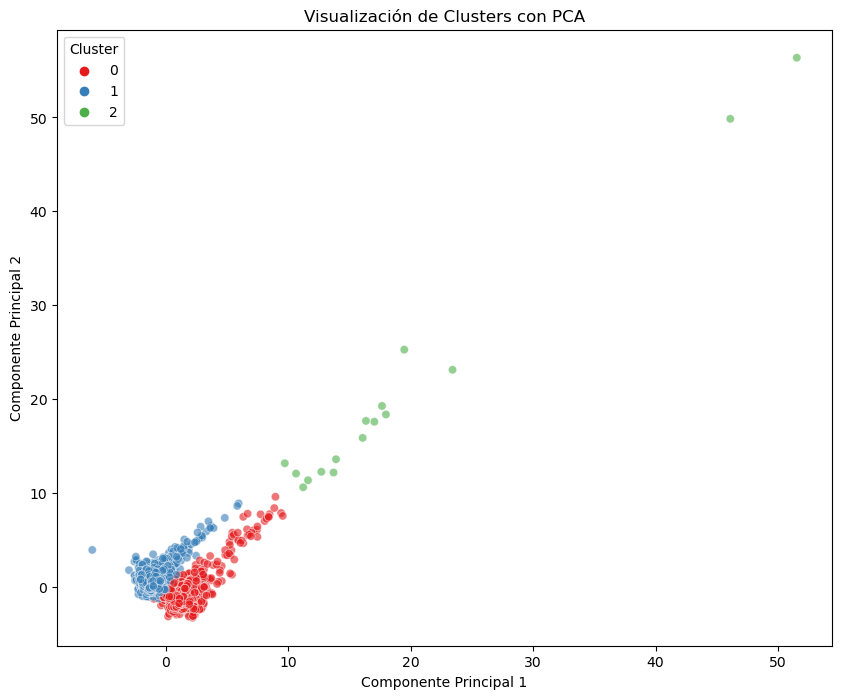

In [35]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Crear un DataFrame con las componentes principales y los clusters
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=df_pca, palette='Set1', alpha=0.6)
plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

Este gráfico proyectará los datos de alta dimensionalidad en un espacio bidimensional para visualizar cómo se distribuyen los clusters. En este contexto, se utiliza el Análisis de Componentes Principales (PCA) para reducir las dimensiones de los datos a dos componentes principales que capturan la mayor variabilidad posible. Finalmente, se crea un scatter plot donde cada punto representa una observación, posicionada según sus dos componentes principales y coloreada según el cluster al que pertenece

# 6. Algoritmos Supervisados

## 6.1. Regresión Lineal

In [12]:
# Entrenamiento del modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predicción y evaluación en el conjunto de validación
y_pred_val = lin_reg.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"MSE en validación: {mse_val}")
print(f"R² en validación: {r2_val}")

MSE en validación: 0.5158242793925503
R² en validación: 0.614434518430838


El código entrena un modelo de regresión lineal utilizando los datos de entrenamiento escalados; específicamente, crea una instancia del modelo `LinearRegression` y la ajusta con `X_train_scaled` y `y_train`. Luego, utiliza el modelo entrenado para predecir los valores en el conjunto de validación escalado `X_val_scaled`. A continuación, calcula el Error Cuadrático Medio (MSE) entre las predicciones y los valores reales mediante `mean_squared_error`, y el coeficiente de determinación R² utilizando `r2_score`. Finalmente, imprime los valores de MSE y R² obtenidos en el conjunto de validación.

Los resultados muestran un MSE en validación de aproximadamente **0.5158**, lo que indica el promedio de los errores al cuadrado entre las predicciones y los valores reales; un valor más bajo es mejor. El coeficiente de determinación R² es aproximadamente **0.6144**, lo que significa que el modelo explica el 61.44% de la variabilidad en los datos de validación. Estos resultados sugieren que el modelo de regresión lineal tiene un rendimiento moderado y podría beneficiarse de mejoras adicionales, como la inclusión de más características, la ingeniería de características existentes o el ajuste de hiperparámetros para aumentar su capacidad predictiva.

### 6.1.1 Gráfico de Dispersión: Valores Reales vs Predichos

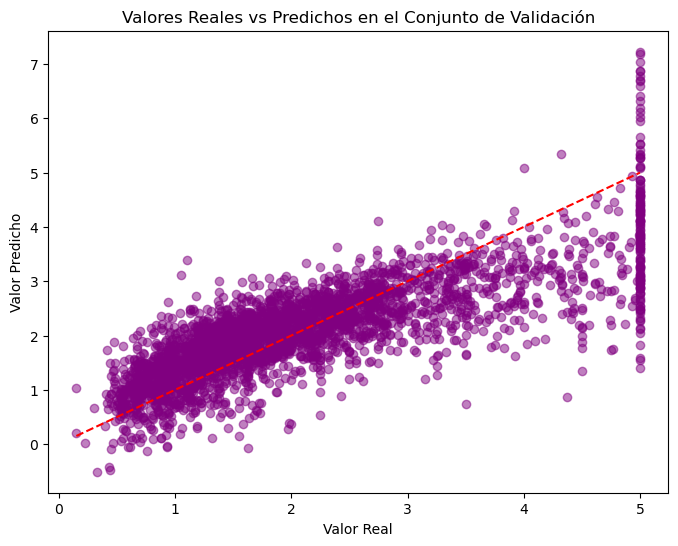

In [42]:
# Gráfico de dispersión de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5, color='purple')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Línea diagonal
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Valores Reales vs Predichos en el Conjunto de Validación')
plt.show()

Este gráfico compara los valores reales de la variable objetivo con los valores predichos por el modelo. Idealmente, los puntos deberían alinearse cerca de la línea diagonal, indicando que las predicciones son cercanas a los valores reales.

- Eje X: Valores reales (y_val).
- Eje Y: Valores predichos (y_pred_val).
- Línea Diagonal Roja: Representa la línea donde los valores predichos son iguales a los reales. Cuanto más cerca estén los puntos de esta línea, mejor es el rendimiento del modelo.

### 6.1.2 Gráfico de Residuales

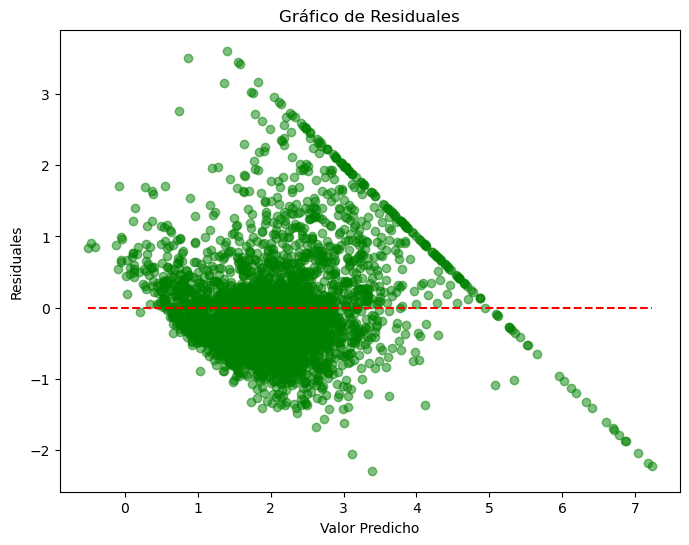

In [44]:
# Cálculo de los residuales
residuals = y_val - y_pred_val

# Gráfico de residuales
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_val, residuals, alpha=0.5, color='green')
plt.hlines(y=0, xmin=y_pred_val.min(), xmax=y_pred_val.max(), colors='red', linestyles='dashed')
plt.xlabel('Valor Predicho')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.show()

Este gráfico muestra los residuales (errores) del modelo en función de los valores predichos. Es útil para detectar patrones no capturados por el modelo y verificar supuestos como la homocedasticidad (igual varianza de los errores).

- Eje X: Valores predichos (y_pred_val).
- Eje Y: Residuales (diferencia entre valores reales y predichos).
- Línea Horizontal Roja: Línea en cero, donde el residuo es cero.
- Análisis: Si los residuales se distribuyen aleatoriamente alrededor de cero sin patrones evidentes, sugiere que el modelo es apropiado. Patrones o estructuras podrían indicar problemas como no linealidad o heterocedasticidad.

## 6.2. Árbol de Decisión (Clasificación)

In [14]:
# Convertir la variable objetivo en categórica (por ejemplo, valor alto o bajo)
median_value = data['MedHouseValue'].median()
y_class = (data['MedHouseValue'] > median_value).astype(int)

# Nueva partición con variable categórica
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.15, random_state=42)
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train_c, y_train_c, test_size=0.1765, random_state=42)

# Escalado
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_val_c_scaled = scaler.transform(X_val_c)
X_test_c_scaled = scaler.transform(X_test_c)

# Entrenamiento del árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_c_scaled, y_train_c)

# Predicción y evaluación
y_pred_val_c = tree_clf.predict(X_val_c_scaled)
accuracy_val = accuracy_score(y_val_c, y_pred_val_c)

print(f"Exactitud en validación: {accuracy_val}")
print("Reporte de clasificación:")
print(classification_report(y_val_c, y_pred_val_c))

Exactitud en validación: 0.8340329350984824
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1514
           1       0.84      0.83      0.84      1583

    accuracy                           0.83      3097
   macro avg       0.83      0.83      0.83      3097
weighted avg       0.83      0.83      0.83      3097



El código transforma la variable objetivo continua `'MedHouseValue'` en una variable categórica binaria basada en su mediana; asigna el valor 1 a las casas cuyo valor medio es mayor que la mediana y 0 a las demás, creando así `y_class`. Luego, divide los datos en conjuntos de entrenamiento, validación y prueba utilizando `train_test_split`, reservando el 15% para prueba y aproximadamente el 15% adicional para validación del conjunto restante. Escala las características de entrada utilizando `StandardScaler`, ajustándolo con el conjunto de entrenamiento y transformando los conjuntos de validación y prueba. A continuación, entrena un modelo de árbol de decisión (`DecisionTreeClassifier`) con los datos de entrenamiento escalados y la variable objetivo categorizada. Finalmente, realiza predicciones en el conjunto de validación escalado, calcula la exactitud con `accuracy_score` y genera un reporte de clasificación detallado mediante `classification_report`.

Los resultados obtenidos indican una **exactitud en validación del 83.40%**, lo que significa que el modelo clasifica correctamente si el valor medio de una casa es alto o bajo en el 83.40% de los casos en el conjunto de validación. El reporte de clasificación muestra métricas equilibradas entre las dos clases (0 y 1), con precisiones y recalls de aproximadamente 0.83 y 0.84, y f1-scores similares. Esto sugiere que el modelo tiene un rendimiento consistente en ambas clases y no está sesgado hacia una clase en particular. Las altas puntuaciones en precisión y recall indican que el modelo es eficaz tanto en identificar correctamente las casas de alto valor como en evitar falsos positivos y falsos negativos.

### 6.2.1 Matriz de Confusión

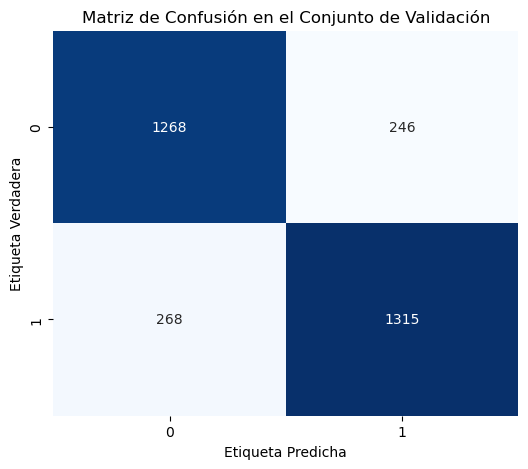

In [45]:
# Importar librería necesaria
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_val_c, y_pred_val_c)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión en el Conjunto de Validación')
plt.show()

La matriz de confusión muestra el rendimiento del modelo de clasificación, indicando el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

- Ejes: Etiquetas verdaderas vs etiquetas predichas.
- Valores Anotados: Número de observaciones en cada categoría.
    - Verdaderos Positivos (VP): Predijo 1 cuando era 1.
    - Verdaderos Negativos (VN): Predijo 0 cuando era 0.
    - Falsos Positivos (FP): Predijo 1 cuando era 0.
    - Falsos Negativos (FN): Predijo 0 cuando era 1.
- Análisis: Permite identificar si el modelo confunde más una clase que otra y entender el tipo de errores que comete.

### 6.2.2. Curva ROC y AUC

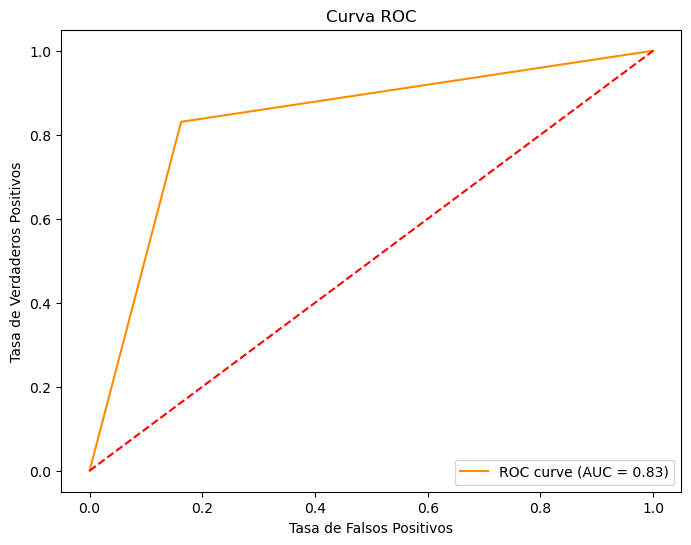

In [49]:
# Importar librerías necesarias
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_scores = tree_clf.predict_proba(X_val_c_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val_c, y_scores)

# Calcular el AUC
auc = roc_auc_score(y_val_c, y_scores)

# Visualización de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

La curva ROC (Receiver Operating Characteristic) muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El área bajo la curva (AUC) proporciona una medida agregada del rendimiento en todos los posibles umbrales.

- Eje X: Tasa de falsos positivos (FPR).
- Eje Y: Tasa de verdaderos positivos (TPR).
- Línea Diagonal Roja: Representa un clasificador aleatorio.
- Curva ROC: Muestra el rendimiento del clasificador en todos los umbrales.
- AUC: Un valor de 0.5 indica un rendimiento aleatorio, mientras que 1.0 indica un clasificador perfecto.
- Análisis: Un AUC más alto indica un mejor rendimiento del modelo en distinguir entre las clases.

# 7. Red Neuronal Artificial

In [16]:
# Construcción del modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Salida para regresión

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluación en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Pérdida en prueba: {test_loss}")
print(f"MAE en prueba: {test_mae}")



Epoch 1/50


452/452 [==============================] - 4s 5ms/step - loss: 1.1276 - mae: 0.6766 - val_loss: 0.4417 - val_mae: 0.4881
Epoch 2/50
452/452 [==============================] - 2s 4ms/step - loss: 0.4126 - mae: 0.4579 - val_loss: 0.3813 - val_mae: 0.4410
Epoch 3/50
452/452 [==============================] - 2s 4ms/step - loss: 0.3774 - mae: 0.4365 - val_loss: 0.3653 - val_mae: 0.4379
Epoch 4/50
452/452 [==============================] - 2s 4ms/step - loss: 0.3604 - mae: 0.4263 - val_loss: 0.3537 - val_mae: 0.4333
Epoch 5/50
452/452 [==============================] - 2s 4ms/step - loss: 0.3585 - mae: 0.4185 - val_loss: 0.3354 - val_mae: 0.4175
Epoch 6/50
452/452 [==============================] - 2s 4ms/step - loss: 0.3382 - mae: 0.4091 - val_loss: 0.3296 - val_mae: 0.3948
Epoch 7/50
452/452 [==============================] - 2s 4ms/step - loss: 0.3312 - mae: 0.4022 - val_loss: 0.3505 - val_mae: 0.4225
Epoch 8/50
452/452 [==============================] - 2s 4ms/step - loss

El código construye un modelo de red neuronal utilizando la API `Sequential` de Keras para abordar un problema de regresión; inicia definiendo el modelo y agrega tres capas densas: la primera capa tiene 64 neuronas con función de activación ReLU y una forma de entrada que coincide con el número de características en los datos de entrenamiento escalados (`X_train_scaled.shape[1]`), la segunda capa tiene 32 neuronas también con activación ReLU, y la capa de salida tiene una sola neurona sin función de activación especificada, adecuada para predicciones continuas en regresión. Luego, el modelo se compila utilizando el optimizador 'adam', la función de pérdida 'mean squared error' (MSE) y la métrica 'mean absolute error' (MAE). El modelo es entrenado con los datos de entrenamiento escalados (`X_train_scaled` y `y_train`) durante 50 épocas, con un tamaño de lote de 32, y se utiliza el conjunto de validación escalado (`X_val_scaled` y `y_val`) para evaluar el rendimiento durante el entrenamiento. Finalmente, el modelo es evaluado en el conjunto de prueba escalado (`X_test_scaled` y `y_test`), y se imprimen la pérdida en prueba y el MAE, proporcionando una medida del rendimiento del modelo en datos no vistos.

Los resultados indican que, después de entrenar el modelo de red neuronal, se realizó una evaluación en el conjunto de prueba, obteniendo una **pérdida en prueba** (error cuadrático medio) de aproximadamente **0.2809** y un **error absoluto medio (MAE)** de alrededor de **0.3643**. Esto significa que, en promedio, las predicciones del modelo difieren de los valores reales en aproximadamente 0.3643 unidades de la variable objetivo. Los valores relativamente bajos de pérdida y MAE sugieren que el modelo ha logrado una precisión razonable en la predicción del valor medio de las casas sobre datos no vistos. Sin embargo, estos resultados también indican que hay margen para mejorar el rendimiento del modelo mediante técnicas adicionales de ajuste y optimización, como ajustar los hiperparámetros, modificar la arquitectura de la red o incorporar técnicas de regularización para evitar el sobreajuste.

## 7.1 Gráfica de la Evolución del Entrenamiento

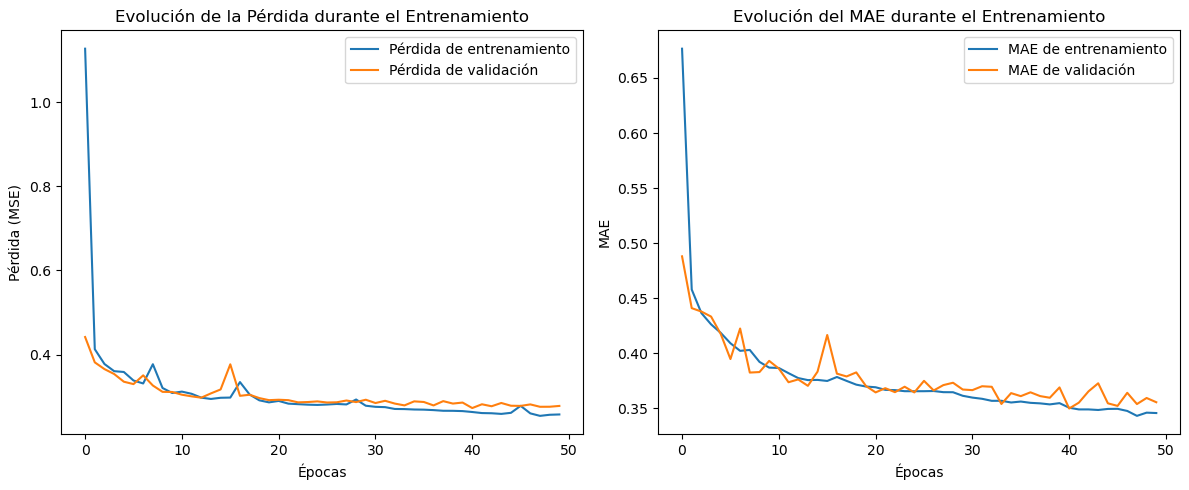

In [51]:
# Importar librerías necesarias
import matplotlib.pyplot as plt

# Gráfica de la función de pérdida y MAE a lo largo de las épocas
plt.figure(figsize=(12, 5))

# Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.legend()

# Error Absoluto Medio (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Evolución del MAE durante el Entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

Esta gráfica muestra cómo la pérdida (MSE) y el error absoluto medio (MAE) del modelo cambian durante el entrenamiento en los conjuntos de entrenamiento y validación. Es útil para detectar problemas como sobreajuste o subajuste.

- Eje X: Número de épocas.
- Eje Y: Valor de la pérdida (MSE) o MAE.
- Curvas: Muestran cómo cambian la pérdida y el MAE en los conjuntos de entrenamiento y validación a lo largo del tiempo.
- Análisis: Si las curvas de validación y entrenamiento divergen significativamente, puede indicar sobreajuste.

## 7.2 Gráfico de Valores Reales vs Predichos en el Conjunto de Prueba

97/97 [==============================] - 0s 3ms/step


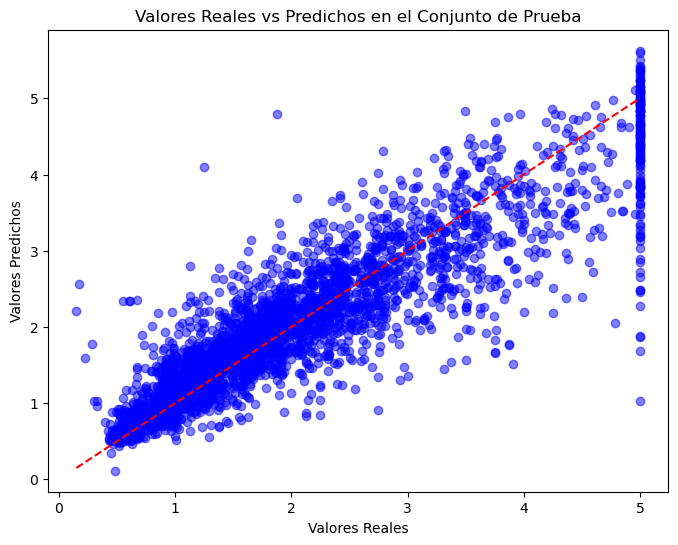

In [54]:
# Importar librerías necesarias
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test_scaled).flatten()

# Gráfico de dispersión de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos en el Conjunto de Prueba')
plt.show()

Este gráfico compara los valores reales de la variable objetivo con los valores predichos por el modelo en el conjunto de prueba. Es útil para evaluar la precisión del modelo y visualizar su rendimiento.

- Eje X: Valores reales de la variable objetivo (y_test).
- Eje Y: Valores predichos por el modelo (y_pred_test).
- Puntos Azules: Cada punto representa una observación en el conjunto de prueba.
- Línea Diagonal Roja: Representa una predicción perfecta (valores reales igual a predichos).
- Análisis: Si los puntos están cerca de la línea diagonal, indica que el modelo predice con alta precisión. La dispersión de los puntos muestra la variabilidad de las predicciones.

# 8. Selección de Modelo

In [21]:
# Definición de hiperparámetros para Grid Search en árbol de decisión
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_c_scaled, y_train_c)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor exactitud en validación cruzada: {grid_search.best_score_}")

# Evaluación del mejor modelo en el conjunto de validación
best_tree_clf = grid_search.best_estimator_
y_pred_val_best = best_tree_clf.predict(X_val_c_scaled)
accuracy_val_best = accuracy_score(y_val_c, y_pred_val_best)

print(f"Exactitud del mejor modelo en validación: {accuracy_val_best}")

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 5}
Mejor exactitud en validación cruzada: 0.8489650877148855
Exactitud del mejor modelo en validación: 0.8572812399095899


El código realiza una búsqueda exhaustiva de hiperparámetros para un clasificador de árbol de decisión utilizando `GridSearchCV`. Define una cuadrícula de parámetros con diferentes valores para `max_depth` y `min_samples_split`, y emplea validación cruzada de 5 pliegues para evaluar el rendimiento del modelo con cada combinación. Después de ajustar el modelo a los datos de entrenamiento escalados (`X_train_c_scaled` y `y_train_c`), el código identifica y muestra los mejores hiperparámetros encontrados y la mejor exactitud promedio obtenida durante la validación cruzada. Finalmente, evalúa el modelo óptimo en el conjunto de validación (`X_val_c_scaled`) y calcula la exactitud obtenida, imprimiendo este valor.

Los resultados indican que los mejores hiperparámetros son `max_depth=10` y `min_samples_split=5`. La mejor exactitud promedio en la validación cruzada es aproximadamente **84.90%**, lo que sugiere un buen rendimiento durante el entrenamiento. Al evaluar el modelo con los mejores hiperparámetros en el conjunto de validación, se obtiene una exactitud de aproximadamente **85.73%**, lo que demuestra que el modelo generaliza bien y mantiene un rendimiento consistente en datos no vistos.

## 8.1 Heatmap de Exactitud en Función de los Hiperparámetros

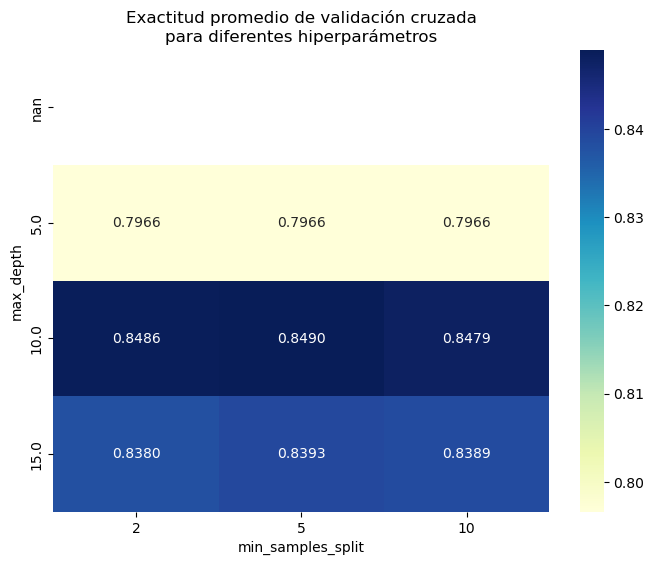

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer resultados de la grid search
results = pd.DataFrame(grid_search.cv_results_)

# Crear una tabla pivot con la media de las puntuaciones
pivot_table = results.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_min_samples_split'
)

# Ordenar índices y columnas
pivot_table = pivot_table.reindex(index=[None, 5, 10, 15], columns=[2, 5, 10])

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title('Exactitud promedio de validación cruzada\npara diferentes hiperparámetros')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.show()

Esta gráfica muestra cómo varía la exactitud promedio de validación cruzada para cada combinación de `max_depth` y `min_samples_split`. Ayuda a identificar visualmente las mejores combinaciones de hiperparámetros.

- Resultados de Grid Search: Se crea un DataFrame con los resultados de la búsqueda de hiperparámetros.
- Tabla Pivot: Se reorganizan los datos para formar una matriz donde las filas representan `max_depth` y las columnas `min_samples_split`.
- Heatmap: Se utiliza `seaborn` para generar el mapa de calor que muestra la exactitud promedio para cada combinación.
- Análisis: Los valores más altos indican mejores combinaciones de hiperparámetros. En el mapa, se puede observar dónde se encuentran las mejores puntuaciones.

## 8.2 Importancia de las Características del Árbol de Decisión

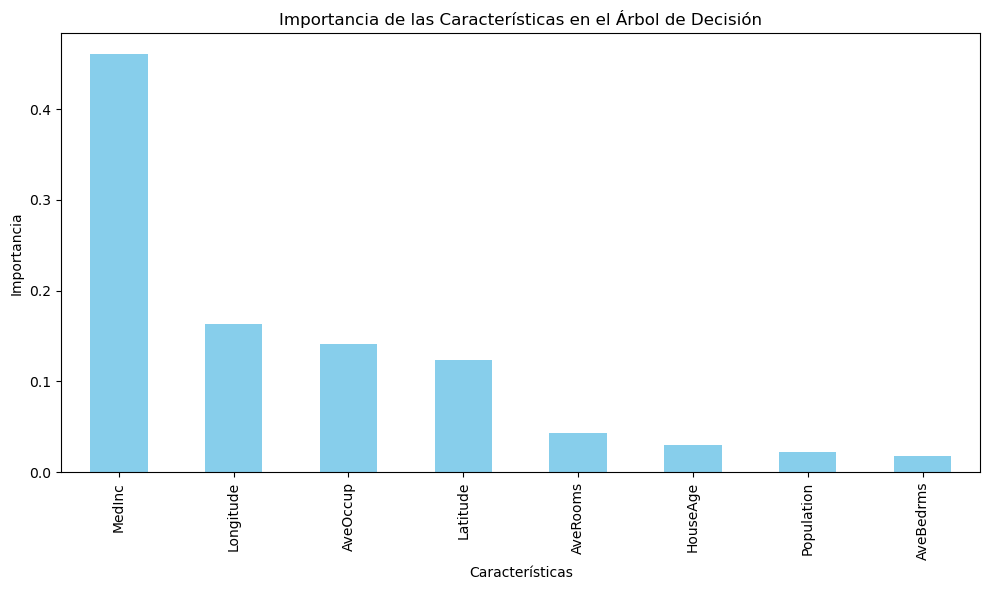

In [61]:
# Obtener la importancia de las características del mejor modelo
feature_importances = best_tree_clf.feature_importances_
features = X_train_c.columns

# Crear un DataFrame para facilitar la visualización
feat_importances = pd.Series(feature_importances, index=features)
feat_importances = feat_importances.sort_values(ascending=False)

# Gráfico de barras de la importancia de las características
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar', color='skyblue')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

Este gráfico muestra la importancia de cada característica en el modelo final. Ayuda a entender cuáles variables contribuyen más a las decisiones del árbol.

- Ordenamiento: Las características se ordenan de mayor a menor importancia.
- Gráfico de Barras: Se visualiza la importancia relativa de cada característica, lo que permite identificar cuáles son más relevantes para el modelo.
- Análisis: Las características con mayor importancia tienen un mayor impacto en las predicciones del modelo.

# 9. Sistema de Procesamiento de Imágenes con ML

## 9.1. Preparación del Conjunto de Datos

Utilizaremos el conjunto de datos MNIST para clasificación de dígitos escritos a mano.

In [38]:
# Importación de conjuntos de datos de Keras
from tensorflow.keras.datasets import mnist

# Carga de datos
(X_train_img, y_train_img), (X_test_img, y_test_img) = mnist.load_data()

# Normalización y redimensionamiento
X_train_img = X_train_img.astype('float32') / 255.0
X_test_img = X_test_img.astype('float32') / 255.0

# Añadir dimensión de canal
X_train_img = np.expand_dims(X_train_img, -1)
X_test_img = np.expand_dims(X_test_img, -1)

# División en entrenamiento y validación
X_train_img, X_val_img, y_train_img, y_val_img = train_test_split(X_train_img, y_train_img, test_size=0.1, random_state=42)

11490434/11490434 [==============================] - 2s 0us/step


El código importa el conjunto de datos MNIST de dígitos escritos a mano utilizando Keras, normaliza las imágenes convirtiendo los valores de píxeles a flotantes entre 0 y 1 y agrega una dimensión adicional para representar el canal de color; luego divide los datos en conjuntos de entrenamiento, validación y prueba.

## 9.2. Construcción del Modelo CNN

In [39]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Construcción del modelo
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))  # 10 clases para dígitos del 0 al 9

# Compilación del modelo
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_cnn = model_cnn.fit(X_train_img, y_train_img, epochs=10, batch_size=64, validation_data=(X_val_img, y_val_img))

# Evaluación en el conjunto de prueba
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test_img, y_test_img)
print(f"Pérdida en prueba: {test_loss_cnn}")
print(f"Exactitud en prueba: {test_acc_cnn}")


Epoch 1/10
844/844 [==============================] - 18s 19ms/step - loss: 0.1653 - accuracy: 0.9505 - val_loss: 0.0621 - val_accuracy: 0.9808
Epoch 2/10
844/844 [==============================] - 15s 18ms/step - loss: 0.0512 - accuracy: 0.9841 - val_loss: 0.0432 - val_accuracy: 0.9878
Epoch 3/10
844/844 [==============================] - 15s 18ms/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.0542 - val_accuracy: 0.9850
Epoch 4/10
844/844 [==============================] - 16s 18ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 5/10
844/844 [==============================] - 16s 19ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0427 - val_accuracy: 0.9892
Epoch 6/10
844/844 [==============================] - 15s 18ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0407 - val_accuracy: 0.9898
Epoch 7/10
844/844 [==============================] - 15s 18ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0510 - val_accuracy

A continuación, construye un modelo de red neuronal convolucional (CNN) utilizando la API Sequential de Keras, que incluye capas de convolución y pooling para extraer características de las imágenes, seguido de capas densas para la clasificación en 10 clases correspondientes a los dígitos del 0 al 9. El modelo se compila con el optimizador 'adam' y la función de pérdida 'sparse_categorical_crossentropy', y se entrena durante 10 épocas con un tamaño de lote de 64, utilizando el conjunto de validación para monitorizar el rendimiento. Finalmente, evalúa el modelo en el conjunto de prueba y muestra la pérdida y la exactitud obtenidas, proporcionando una medida del rendimiento del modelo en datos no vistos.

Los resultados indican que, tras entrenar y evaluar el modelo de red neuronal convolucional en el conjunto de prueba, se obtuvo una **pérdida en prueba** de aproximadamente **0.0311** y una **exactitud en prueba** de **99.25%**. Esto significa que el modelo es altamente efectivo en la clasificación de los dígitos escritos a mano del conjunto de datos MNIST, logrando predecir correctamente el 99.25% de las imágenes de prueba. El bajo valor de pérdida y la alta exactitud sugieren que el modelo ha aprendido de manera eficiente las características relevantes de las imágenes y es capaz de generalizar bien a datos no vistos, demostrando un rendimiento excelente en la tarea de clasificación.

## 9.3. Interpretación de Resultados

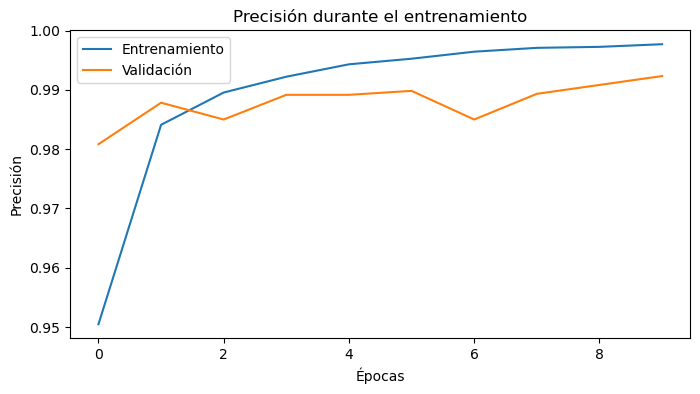

313/313 [==============================] - 2s 7ms/step


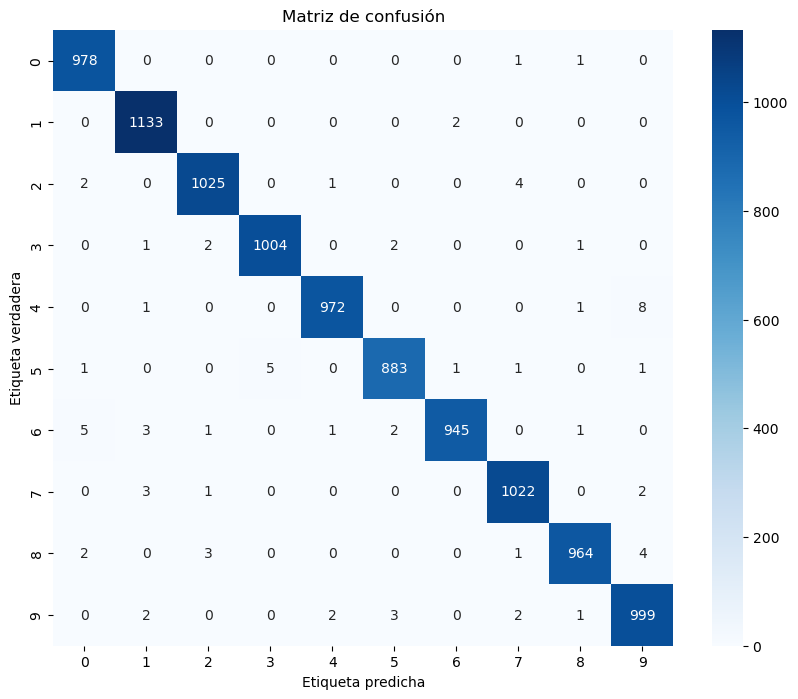

In [40]:
# Visualización de precisión durante el entrenamiento
plt.figure(figsize=(8, 4))
plt.plot(history_cnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicciones en el conjunto de prueba
y_pred_img = model_cnn.predict(X_test_img)
y_pred_classes = np.argmax(y_pred_img, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test_img, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de confusión')
plt.show()